## Objective: 
Predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

## Attribute Information

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: "jan" to "dec"

day - day of the week: "mon" to "sun"

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84

FFMC - fuel moisture of forest litter fuels under the shade of a forest canopy

DMC - fuel moisture of decomposed organic material underneath the litter

DC - drying deep into the soil

ISI - fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential

In [2]:
# Loading data
data = pd.read_csv('forestfires.csv')

In [3]:
# One Hot Encoding
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),  \
        (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),  \
        (1,2,3,4,5,6,7), inplace=True)

In [4]:
print("Head: ")
data.head()

Head: 


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
print("Statistical Description:")
data.describe()

Statistical Description:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
print("Shape:")
data.shape

Shape:


(517, 13)

In [7]:
print("Data Types Information:")
data.info()

Data Types Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


The observation shows that:

    1. Most of the columns are numeric features.

    2. There is no missing value in any column.

In [8]:
# For plotting correlation plot
data.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


<AxesSubplot:>

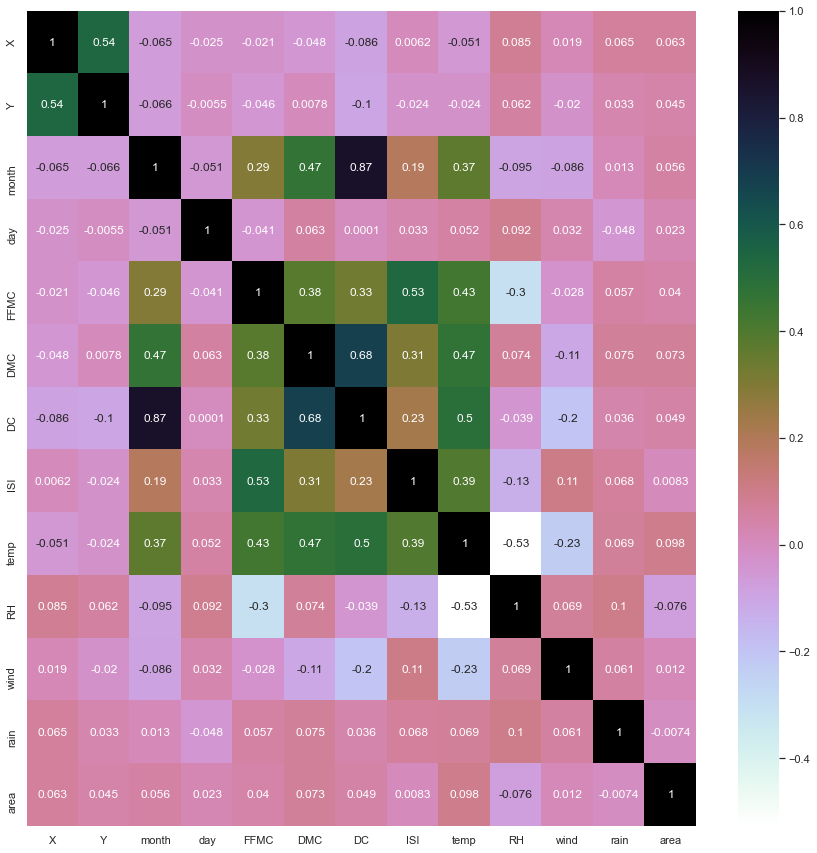

In [9]:
sns.set(style="white", color_codes=True)
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

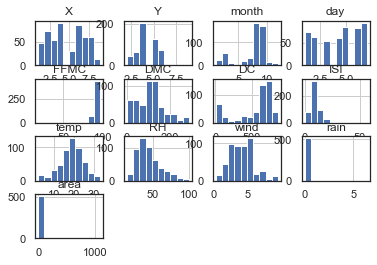

In [10]:
# Plotting Histogram of data
data.hist()

'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

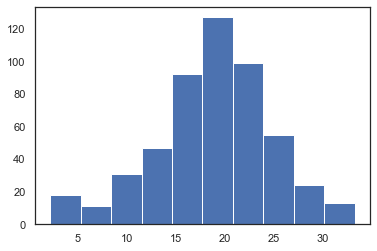

In [11]:
plt.hist(data.temp)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

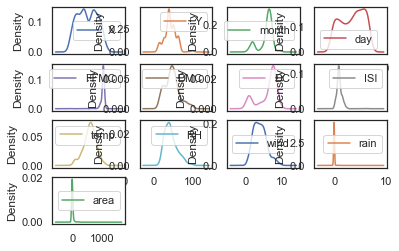

In [12]:
# Plotting desnity plot
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False)

In [13]:
#Feature Selection

dataset = data.values

X = dataset[:,0:12] # selecting all 12 columns instead of 'area'
Y = dataset[:,12]   # selecting 'area' as target 

model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Present features: ", list(data.columns))
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
Number of Features:  3
Present features:  ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Selected Features:  [False False False False False  True False False  True False  True False]
Feature Ranking:  [ 6  7  9  4  2  1  5  8  1  3  1 10]


'Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was actually one of the attributes with the highest correlation with the 'Area'

In [14]:
# trying different models

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    results.append(mae)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.023975 (19.309939)
Ridge: 0.023975 (19.307816)
Lasso: 0.023297 (19.054901)
ElasticNet: 0.023187 (19.055855)
Bag_Re: 0.729398 (8.366342)
RandomForest: 0.868290 (7.831282)
ExtraTreesRegressor: 0.999897 (0.096441)
KNN: 0.273047 (15.507250)
CART: 0.999897 (0.096441)
SVM: 0.000503 (12.808832)


'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', and these can be further explored and their hyperparameters tuned